In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil

In [27]:
list_data = os.listdir('224_sized/')

In [8]:
os.mkdir('binary_Ground_Truth')

In [31]:
for image_name in list_data:
    if image_name.endswith(".jpg"):
        try:
            image = cv2.imread(f"224_sized/{image_name}", 0)
            text_file_name = image_name.replace(".jpg",".txt")
            with open(f'224_sized/{text_file_name}') as text_file:
                text = text_file.read()

            points = text.split()         
            w_center_box = int(float(points[1])*224)
            h_center_box = int(float(points[2])*224)
            delta_w = int(float(points[3])* 224)
            delta_h = int(float(points[4])* 224)

            croped_image = image[max(0,int(h_center_box-(delta_h/2)-5)):min(244,int(h_center_box+(delta_h/2)+5)),
                                 max(0,int(w_center_box-(delta_w/2)-5)):min(244,int(w_center_box+(delta_w/2)+5))]

            binary_cropped_image = cv2.threshold(croped_image,0,255,cv2.THRESH_OTSU)[1]

            new_image = np.zeros((224,224))

            new_image[max(0,int(h_center_box-(delta_h/2)-5)):min(244,int(h_center_box+(delta_h/2)+5)),
                      max(0,int(w_center_box-(delta_w/2)-5)):min(244,int(w_center_box+(delta_w/2)+5))] += binary_cropped_image

            cv2.imwrite(f'binary_Ground_Truth/{image_name}', new_image)
            shutil.copy(f'224_sized/{text_file_name}',f'binary_Ground_Truth/{text_file_name}')
        
        except:
            print(image_name)

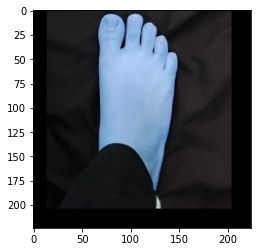

In [25]:
im = cv2.imread('224_sized/sample (75).jpg')
plt.imshow(im)